# Activity 1

# 1. Model Implementation:
## 
o Build a decision tree model and visualize the tree 
o Implement a random forest to improve model performance and reduc 
overfitting.

#### first step is to import the libraries and files

In [15]:
import pandas as pd

In [16]:
# Load the dataset
loan = pd.read_csv('test.csv')  # Replace with the correct path
# Display basic information and first few rows of the dataset
print("Initial Data Info:")
print(loan.info())
print(loan.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No  

### fill the missing values with the categorical and numerical values

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
# Fill missing values for categorical variables with the most frequent value
categorical_cols = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History']
imputer = SimpleImputer(strategy='most_frequent')
loan[categorical_cols] = imputer.fit_transform(loan[categorical_cols])

# Fill missing values for numerical variables with the median value
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
imputer = SimpleImputer(strategy='median')
loan[numerical_cols] = imputer.fit_transform(loan[numerical_cols])

# Encode categorical variables
label_encoders = {}
for column in loan.select_dtypes(include=['object']).columns:
    if column != 'Loan_ID':
        label_encoders[column] = LabelEncoder()
        loan[column] = label_encoders[column].fit_transform(loan[column])

# Display the processed data
print("\nProcessed Data Info:")
print(loan.info())
print(loan.head())


Processed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int32  
 11  Property_Area      367 non-null    int32  
dtypes: float64(2), int32(7), int64(2), object(1)
memory usage: 24.5+ KB
None
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0  

## code for making decison tree

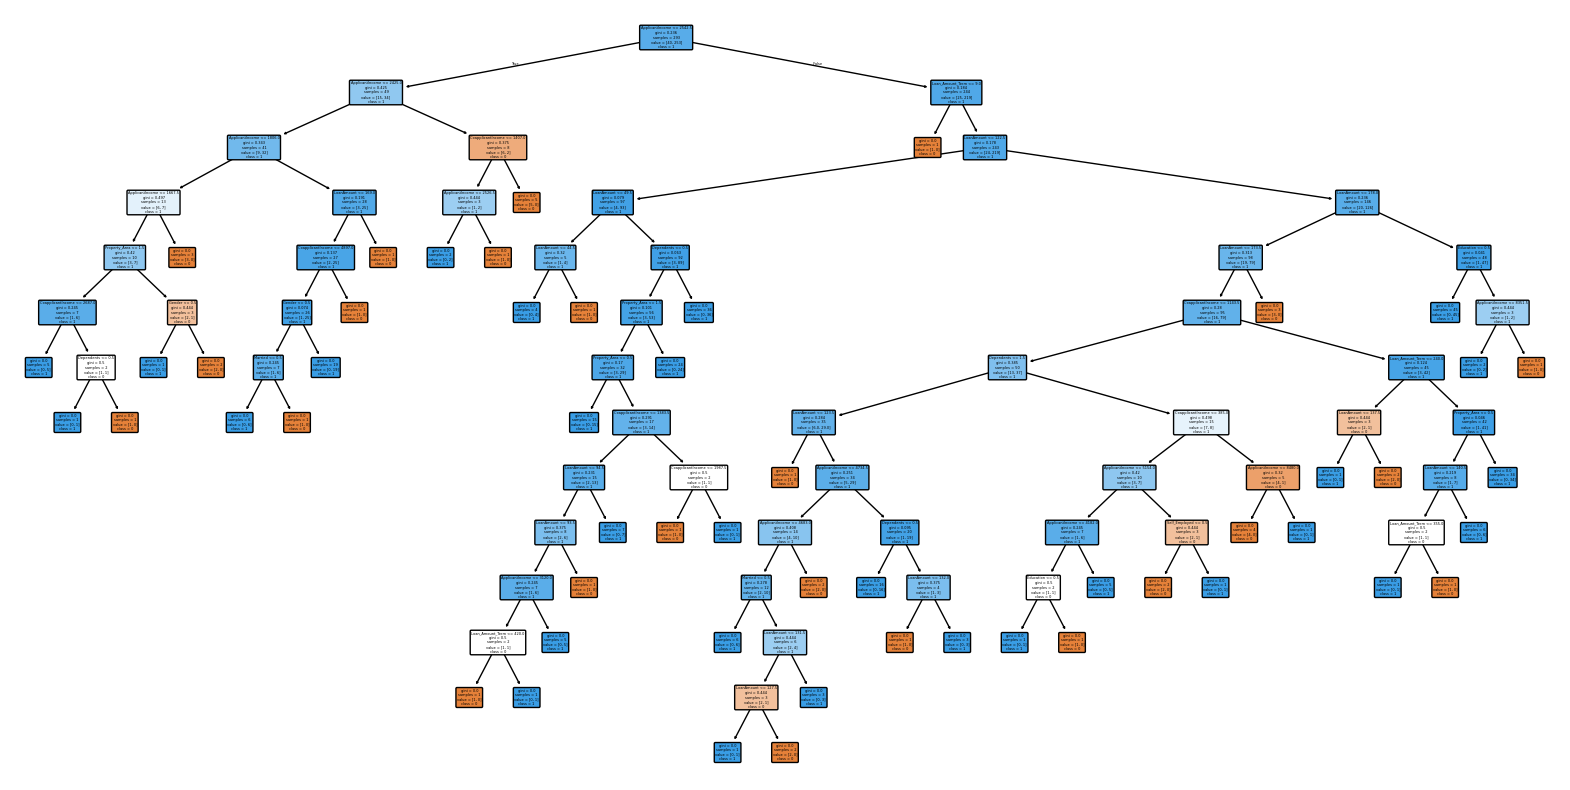

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Separate the features and target variable (using Credit_History as a proxy target for demonstration)
X = loan.drop(columns=['Loan_ID', 'Credit_History'])
y = loan['Credit_History']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

## code for random tree decisons and trainings

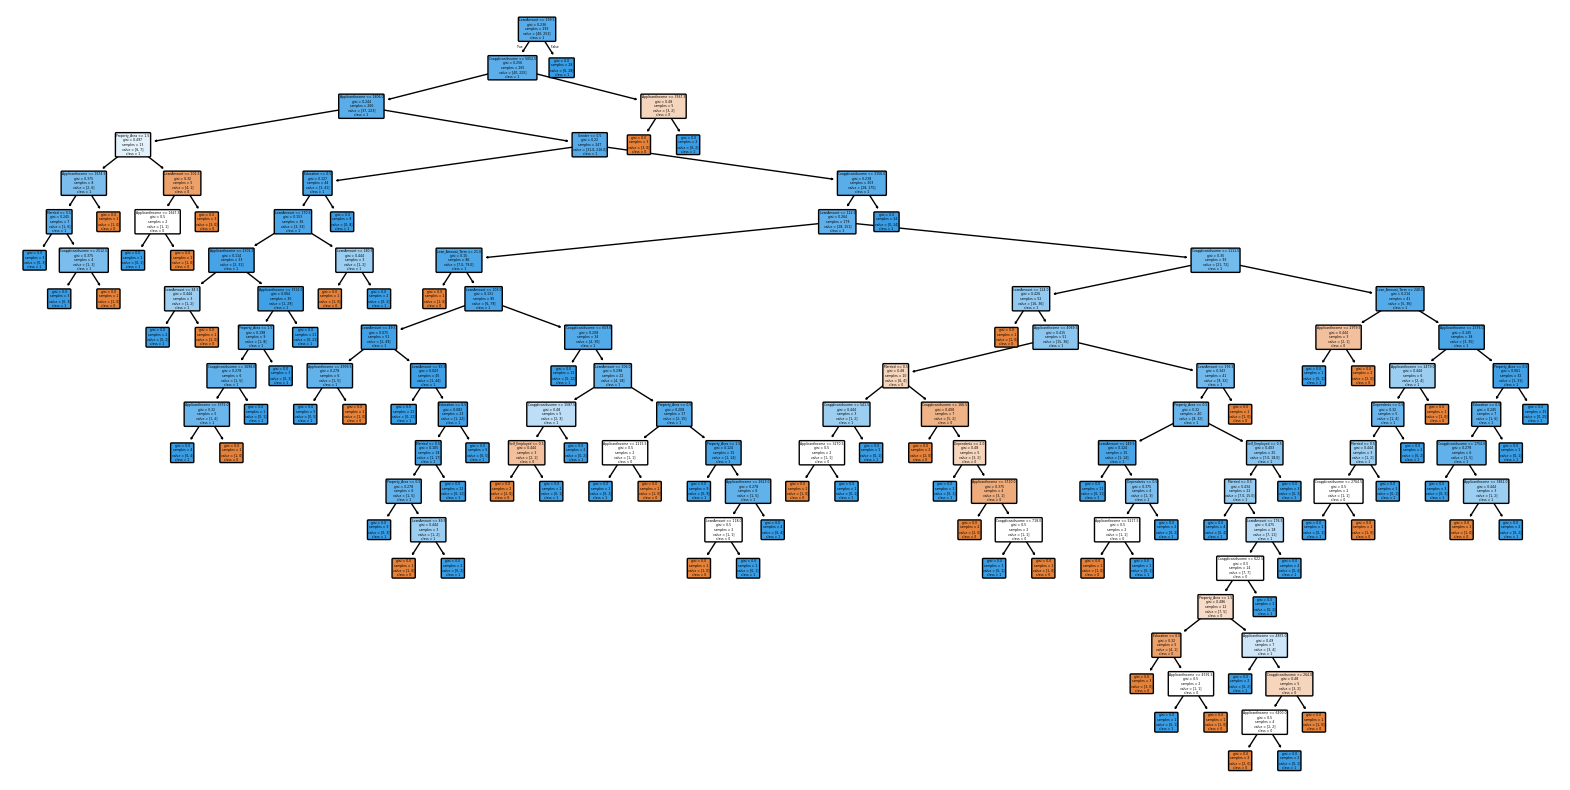

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Train the random forest classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Train a randomized decision tree (single tree in random forest with bootstrap=False)
random_tree = RandomForestClassifier(n_estimators=1, bootstrap=False, random_state=42)
random_tree.fit(X_train, y_train)

# Extract the single tree from the random forest
randomized_decision_tree = random_tree.estimators_[0]

# Visualize the randomized decision tree
plt.figure(figsize=(20,10))
plot_tree(randomized_decision_tree, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


## predictions of all model

In [20]:
# Make predictions with all models
y_pred_tree = decision_tree.predict(X_test)
y_pred_forest = random_forest.predict(X_test)
y_pred_random_tree = random_tree.predict(X_test)

## compare of both model Performance Comparison:## 
o Compare the performance of the decision tree and random forest using
accuracy, F1-score, and other relevant metrics

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate performance of all models
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

performance_tree = {name: metric(y_test, y_pred_tree) for name, metric in metrics.items()}
performance_forest = {name: metric(y_test, y_pred_forest) for name, metric in metrics.items()}
performance_random_tree = {name: metric(y_test, y_pred_random_tree) for name, metric in metrics.items()}

# Generate classification reports
report_tree = classification_report(y_test, y_pred_tree, target_names=['0', '1'])
report_forest = classification_report(y_test, y_pred_forest, target_names=['0', '1'])
report_random_tree = classification_report(y_test, y_pred_random_tree, target_names=['0', '1'])

# Display performance comparison
print("\nDecision Tree Performance:")
for metric, value in performance_tree.items():
    print(f"{metric}: {value:.4f}")

print("\nRandom Forest Performance:")
for metric, value in performance_forest.items():
    print(f"{metric}: {value:.4f}")

print("\nRandomized Decision Tree Performance:")
for metric, value in performance_random_tree.items():
    print(f"{metric}: {value:.4f}")

print("\nClassification Report for Decision Tree:\n", report_tree)
print("Classification Report for Random Forest:\n", report_forest)
print("Classification Report for Randomized Decision Tree:\n", report_random_tree)


Decision Tree Performance:
Accuracy: 0.6757
Precision: 0.7818
Recall: 0.7818
F1 Score: 0.7818

Random Forest Performance:
Accuracy: 0.7568
Precision: 0.7606
Recall: 0.9818
F1 Score: 0.8571

Randomized Decision Tree Performance:
Accuracy: 0.6757
Precision: 0.7818
Recall: 0.7818
F1 Score: 0.7818

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.37      0.37      0.37        19
           1       0.78      0.78      0.78        55

    accuracy                           0.68        74
   macro avg       0.58      0.58      0.58        74
weighted avg       0.68      0.68      0.68        74

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.76      0.98      0.86        55

    accuracy                           0.76        74
   macro avg       0.71      0.54      0.52        74
weighted avg       0